In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
from google.colab import files


uploaded = files.upload()

Saving recipes.json to recipes.json


In [13]:
data = pd.read_json('recipes.json', lines=True)

In [14]:
data.head(5)

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1617 non-null   object
 1   url          1617 non-null   object
 2   Description  1429 non-null   object
 3   Author       1611 non-null   object
 4   Ingredients  1617 non-null   object
 5   Method       1617 non-null   object
dtypes: object(6)
memory usage: 75.9+ KB


In [16]:
data['Ingredients'].head(5)

0    [2 tbsp olive oil, knob butter, 1 onion, finel...
1    [175g butter, chopped, 200g dark muscovado sug...
2    [200g dark muscovado sugar, 175g butter, chopp...
3    [500g strong white flour, plus extra for dusti...
4    [280g self-raising flour, 175g golden caster s...
Name: Ingredients, dtype: object

In [17]:
# task 2 - cleaning
data['Ingredients'] = data['Ingredients'].map(lambda x: re.sub(r'[^a-zA-Z]', ', ', str(x)))

In [18]:
data = data.dropna(subset=['Ingredients'])

In [19]:
stop = stopwords.words('english') + ['tsp', 'tbsp', 'finely', 'extra', 'chopped']
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
# task 3 - remove encoding
def remove_encoding_word(word):
  word =  str(word)
  word = word.encode('ASCII', 'ignore').decode('ASCII')
  return word

In [21]:
def remove_encoding_text(text):
  text = str(text)
  text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
  return text

In [22]:
# task 4 - define lemmatizing
data['Ingredients'] = data['Ingredients'].apply(remove_encoding_text)

In [23]:
text = ' '.join(words for words in data['Ingredients'])
len(text)

643841

In [24]:
lemma = WordNetLemmatizer().lemmatize

In [25]:
lemma('leaves')

'leaf'

In [26]:
# task 5 - fit and transform text, with or without lemmatizing
def tokenize(document):
  tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
  return tokens

In [27]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2, 2)), stop_words = stop, strip_accents = 'unicode')


In [30]:
vectorizer = TfidfVectorizer(ngram_range=(2, 2))
tdm = vectorizer.fit_transform(data['Ingredients'])

In [29]:
data['Ingredients'].fillna('None', inplace=True)


In [31]:
vectorizer.vocabulary_.items()

dict_items([('tbsp olive', 17965), ('olive oil', 11522), ('oil knob', 11433), ('knob butter', 8863), ('butter onion', 2142), ('onion finely', 11621), ('finely chopped', 6126), ('chopped sausagemeat', 3384), ('sausagemeat or', 15204), ('or skinned', 12058), ('skinned sausages', 15931), ('sausages grated', 15212), ('grated zest', 7334), ('zest of', 20496), ('of lemon', 11233), ('lemon fresh', 9368), ('fresh white', 6596), ('white breadcrumbs', 19953), ('breadcrumbs ready', 1817), ('ready to', 14385), ('to eat', 18595), ('eat dried', 5589), ('dried apricots', 5291), ('apricots chopped', 720), ('chopped chestnut', 3207), ('chestnut canned', 2848), ('canned or', 2412), ('or vacuum', 12105), ('vacuum packed', 19480), ('packed chopped', 12578), ('chopped tsp', 3435), ('tsp chopped', 18939), ('chopped fresh', 3265), ('fresh or', 6562), ('or tsp', 12099), ('tsp dried', 18966), ('dried thyme', 5358), ('thyme cranberries', 18461), ('cranberries fresh', 4308), ('or frozen', 11910), ('frozen bonele

In [32]:
# task 6 -  get word frequencies and create wordcloud
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [33]:
tfidf_weights[0:10]

[('tbsp olive', 18.7755509845582),
 ('olive oil', 24.07545683746428),
 ('oil knob', 0.6786243733220447),
 ('knob butter', 0.688300331760885),
 ('butter onion', 1.9949013276267442),
 ('onion finely', 6.830355196540291),
 ('finely chopped', 26.346744391634395),
 ('chopped sausagemeat', 0.5149065229547151),
 ('sausagemeat or', 0.35277998716758163),
 ('or skinned', 0.1694834382113516)]

In [34]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))

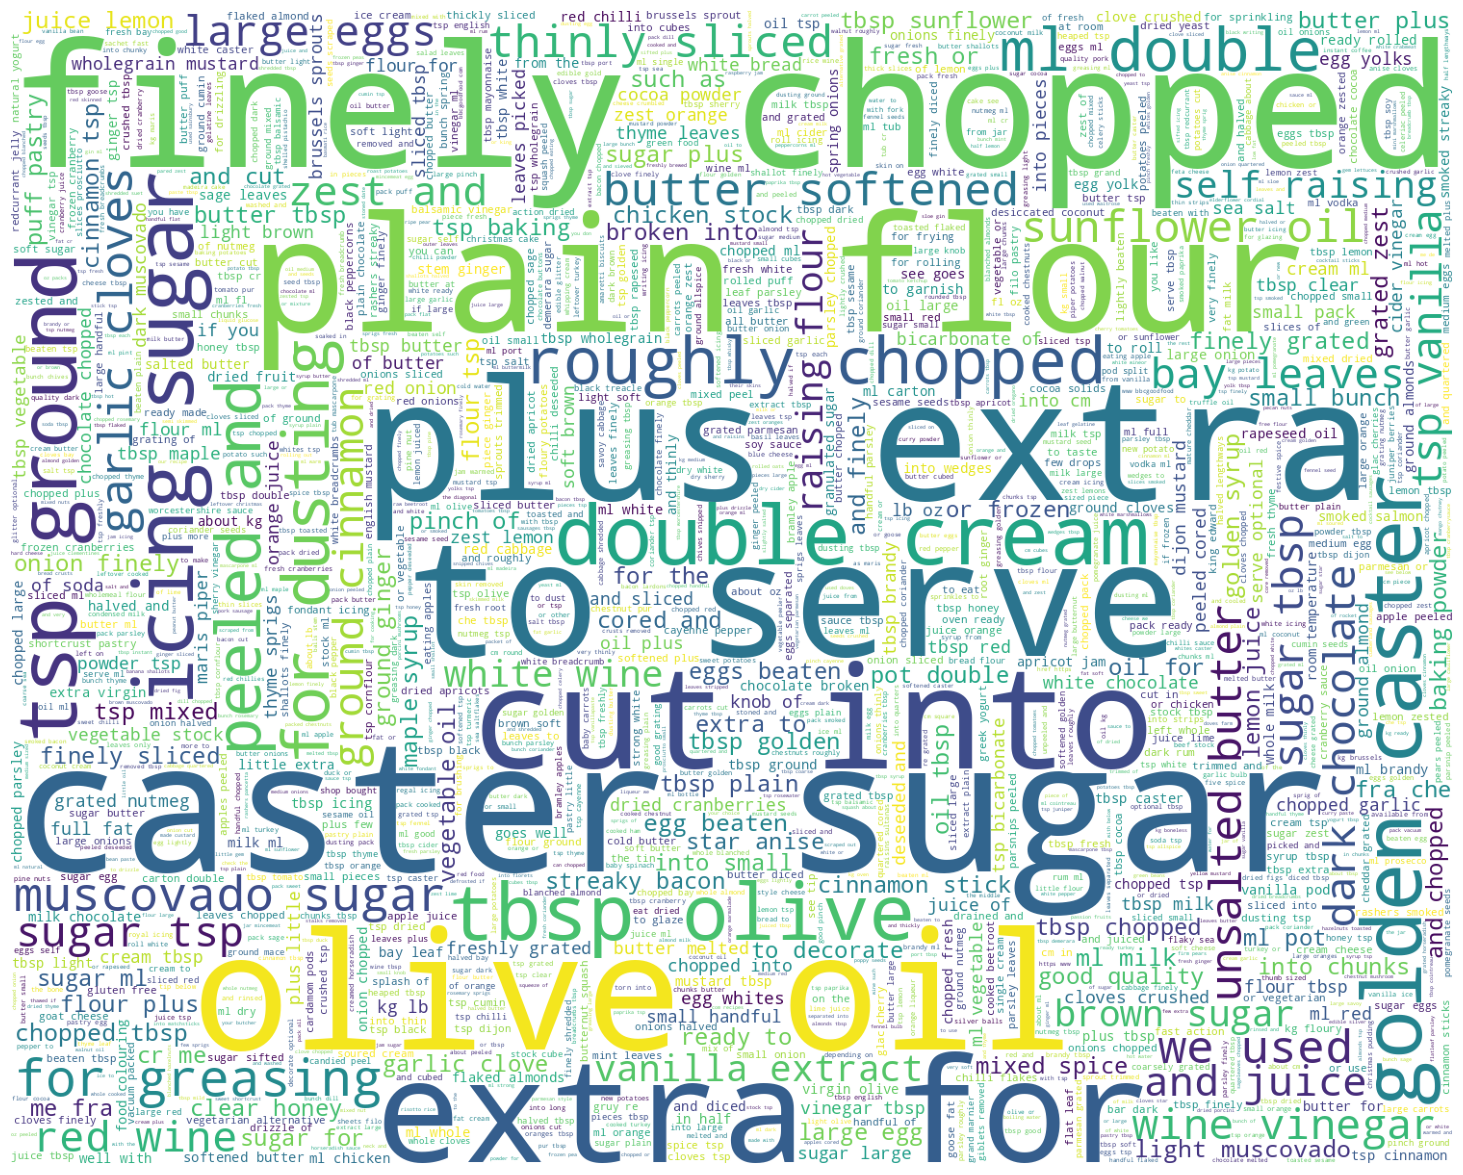

In [35]:
plt.figure(figsize=(20, 15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')